<a href="https://colab.research.google.com/github/navinkrishna-tb/Stock_Prediction_LSTM/blob/main/Lstm_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Using LSTM


### Cleaning Dataset For Training


In [9]:
import pandas as pd
import numpy

df = pd.read_csv('/content/drive/MyDrive/stock_apps/dataset/HCLTECH.NS.csv')
df.dropna(inplace=True)
test_list = df.values
res = [float(ele) for ele in test_list] 

res = numpy.array(res)
numpy.savetxt("/content/drive/MyDrive/stock_apps/dataset/HCLTECH.NS.csv", res, delimiter=",")

# Functions For Preprocesssing and Model Definition


In [10]:
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt



warnings.filterwarnings("ignore")
class lstm:
    def plot_results_multiple(predicted_data, true_data, prediction_len):
        fig = plt.figure(facecolor='white')
        ax = fig.add_subplot(111)
        ax.plot(true_data, label='True Data')
        print('yo')
        #Pad the list of predictions to shift it in the graph to it's correct start
        for i, data in enumerate(predicted_data):
            padding = [None for p in range(i * prediction_len)]
            plt.plot(padding + data, label='Prediction')
            plt.legend()
        plt.show()

    def load_data(filename, seq_len, normalise_window):
        f = open(filename, 'r').read()
        data = f.split('\n')

        sequence_length = seq_len + 1
        result = []
        for index in range(len(data) - sequence_length):
            result.append(data[index: index + sequence_length])
        
        if normalise_window:
            result = lstm.normalise_windows(result)

        result = np.array(result)

        row = round(0.9 * result.shape[0])
        train = result[:int(row), :]
        np.random.shuffle(train)
        x_train = train[:, :-1]
        y_train = train[:, -1]
        x_test = result[int(row):, :-1]
        y_test = result[int(row):, -1]

        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

        return [x_train, y_train, x_test, y_test]

    def normalise_windows(window_data):
        normalised_data = []
        for window in window_data:
            normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
            normalised_data.append(normalised_window)
        return normalised_data

    def build_model():
        model=Sequential()
        model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
        model.add(LSTM(50,return_sequences=True))
        model.add(LSTM(50))
        model.add(Dense(1))
        start = time.time()
        model.compile(loss='mean_squared_error',optimizer='rmsprop')
        print('compilation time : ', time.time() - start)
        return model

    def predict_point_by_point(model, data):
        #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
        predicted = model.predict(data)
        predicted = np.reshape(predicted, (predicted.size,))
        return predicted

    def predict_sequence_full(model, data, window_size):
        #Shift the window by 1 new prediction each time, re-run predictions on new window
        curr_frame = data[0]
        predicted = []
        for i in range(len(data)):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        return predicted

    def predict_sequences_multiple(model, data, window_size, prediction_len):
        #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
        prediction_seqs = []
        for i in range(int(np.floor(len(data)/prediction_len))):
            curr_frame = data[i*prediction_len]
            predicted = []
            for j in range(prediction_len):
                predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
                curr_frame = curr_frame[1:]
                curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
            prediction_seqs.append(predicted)
        return prediction_seqs

### Loading Dataset For Training

In [12]:
X_train, y_train, X_test, y_test = lstm.load_data('/content/drive/MyDrive/stock_apps/dataset/HCLTECH.NS.csv', 50, True)

### Building Model

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [14]:
model = lstm.build_model()

compilation time :  0.006511211395263672


### Training Model

In [17]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.05)

Epoch 1/50
2/2 [==============================] - 0s 236ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 2/50
2/2 [==============================] - 0s 236ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 3/50
2/2 [==============================] - 0s 228ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 4/50
2/2 [==============================] - 0s 229ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/50
2/2 [==============================] - 0s 232ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/50
2/2 [==============================] - 0s 233ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 7/50
2/2 [==============================] - 0s 231ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 8/50
2/2 [==============================] - 0s 229ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 9/50
2/2 [==============================] - 0s 238ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
2/2 [==============================] - 0s 229ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 11/50
2/2 [==

### Visualizing the Predictions

yo


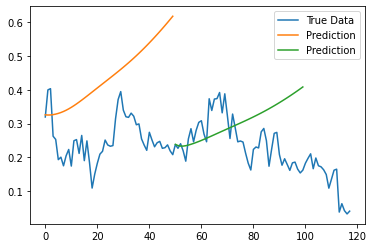

In [18]:

#Step 4 - Plot the predictions!
from datetime import date

predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)
